In [1]:
# Loading dataset for cats and dogs
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-07-07 15:56:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  28.7MB/s    in 2.3s    

2023-07-07 15:56:32 (28.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Extracting data
import zipfile

zipfile_localation = "/content/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(zipfile_localation, "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
# assigning directories
train_loc = "/content/cats_and_dogs_filtered/train"
val_loc = "/content/cats_and_dogs_filtered/validation"

train_cats_loc = "/content/cats_and_dogs_filtered/train/cats"
train_dogs_loc = "/content/cats_and_dogs_filtered/train/dogs"

val_cats_loc = "/content/cats_and_dogs_filtered/validation/cats"
val_dogs_loc = "/content/cats_and_dogs_filtered/validation/dogs"

Building a CNN model

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

We will be applying preprocessing in our dataset using generators image_dataset_from_directory function. It helps to make batchs of images will be fed into RAM. Without creating batches of images we will run out of RAM.

In [18]:
# using generators for train and val set

train_generator = keras.utils.image_dataset_from_directory(directory=train_loc,
                                                            labels = "inferred",
                                                            label_mode="int",
                                                            batch_size=32,
                                                            image_size=(150, 150))

val_generator = keras.utils.image_dataset_from_directory(directory=val_loc,
                                                            labels = "inferred",
                                                            label_mode="int",
                                                            batch_size=32,
                                                            image_size=(150, 150))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Since neural network perform well in normalized data, we will normalize our input image in range from 0 to 1

In [19]:
# Normalizing
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_generator = train_generator.map(process)
val_generator = val_generator.map(process)

Below code can also be used for normalizing and generatoring generator

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
# train_datagen = ImageDataGenerator( rescale = 1.0/255. )
# test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     batch_size=20,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
# validation_generator =  test_datagen.flow_from_directory(validation_dir,
#                                                          batch_size=20,
#                                                          class_mode  = 'binary',
#                                                          target_size = (150, 150))

Build our model

In [25]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), padding = "valid", activation = "relu", input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Conv2D(32, kernel_size=(3,3), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [27]:
history1 = model.fit(train_generator, epochs = 10, validation_data=val_generator)

Epoch 1/10
63/63 [==============================] - 8s 59ms/step - loss: 0.6824 - accuracy: 0.5640 - val_loss: 0.7479 - val_accuracy: 0.5360
Epoch 2/10
63/63 [==============================] - 4s 54ms/step - loss: 0.6481 - accuracy: 0.6240 - val_loss: 0.6458 - val_accuracy: 0.6560
Epoch 3/10
63/63 [==============================] - 6s 85ms/step - loss: 0.5884 - accuracy: 0.6970 - val_loss: 0.6085 - val_accuracy: 0.6910
Epoch 4/10
63/63 [==============================] - 3s 51ms/step - loss: 0.5518 - accuracy: 0.7210 - val_loss: 0.5939 - val_accuracy: 0.7030
Epoch 5/10
63/63 [==============================] - 5s 71ms/step - loss: 0.4331 - accuracy: 0.8055 - val_loss: 0.6326 - val_accuracy: 0.6990
Epoch 6/10
63/63 [==============================] - 4s 55ms/step - loss: 0.3390 - accuracy: 0.8510 - val_loss: 0.6479 - val_accuracy: 0.7190
Epoch 7/10
63/63 [==============================] - 4s 55ms/step - loss: 0.2748 - accuracy: 0.8855 - val_loss: 0.7556 - val_accuracy: 0.7140
Epoch 8/10
63

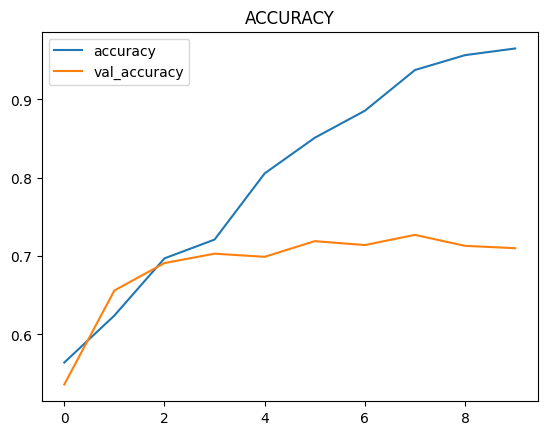

In [31]:
import matplotlib.pyplot as plt

plt.plot(history1.history["accuracy"], label = "accuracy")
plt.plot(history1.history["val_accuracy"], label = "val_accuracy")
plt.title("ACCURACY")
plt.legend()
plt.show()

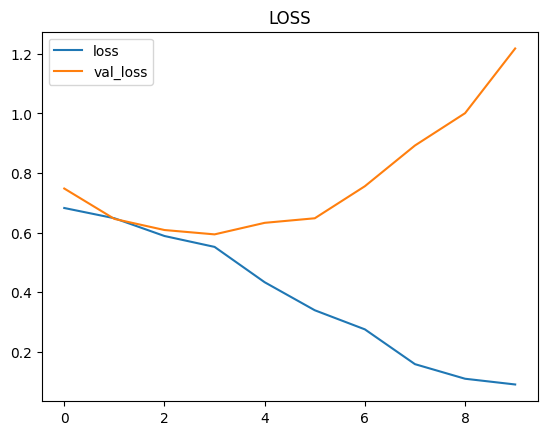

In [30]:
plt.plot(history1.history["loss"], label = "loss")
plt.plot(history1.history["val_loss"], label = "val_loss")
plt.legend()
plt.title("LOSS")
plt.show()

We can clearly see that our model is overfitting. So using dropout layer and batchnormalization to resolve the overfitting.

In [44]:
from keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), padding = "valid", activation = "relu", input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Conv2D(32, kernel_size=(3,3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [42]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 150, 150, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 75, 75, 32)       128       
 chNormalization)                                                
                                                      

In [45]:
history2 = model.fit(train_generator, epochs = 10, validation_data=val_generator)

Epoch 1/10
63/63 [==============================] - 9s 60ms/step - loss: 1.3942 - accuracy: 0.5665 - val_loss: 0.9668 - val_accuracy: 0.4990
Epoch 2/10
63/63 [==============================] - 4s 57ms/step - loss: 0.7186 - accuracy: 0.6455 - val_loss: 1.8445 - val_accuracy: 0.5010
Epoch 3/10
63/63 [==============================] - 5s 71ms/step - loss: 0.6093 - accuracy: 0.7055 - val_loss: 2.0029 - val_accuracy: 0.5030
Epoch 4/10
63/63 [==============================] - 3s 51ms/step - loss: 0.5492 - accuracy: 0.7530 - val_loss: 0.8965 - val_accuracy: 0.5720
Epoch 5/10
63/63 [==============================] - 3s 50ms/step - loss: 0.4374 - accuracy: 0.7955 - val_loss: 1.7688 - val_accuracy: 0.5130
Epoch 6/10
63/63 [==============================] - 4s 62ms/step - loss: 0.3724 - accuracy: 0.8420 - val_loss: 1.1989 - val_accuracy: 0.5870
Epoch 7/10
63/63 [==============================] - 4s 56ms/step - loss: 0.2906 - accuracy: 0.8740 - val_loss: 1.0929 - val_accuracy: 0.6180
Epoch 8/10
63

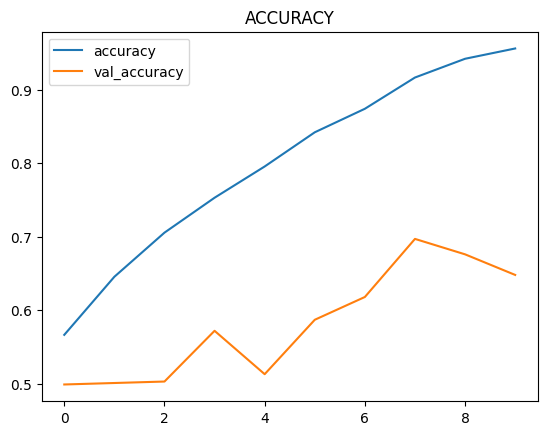

In [46]:
plt.plot(history2.history["accuracy"], label = "accuracy")
plt.plot(history2.history["val_accuracy"], label = "val_accuracy")
plt.title("ACCURACY")
plt.legend()
plt.show()

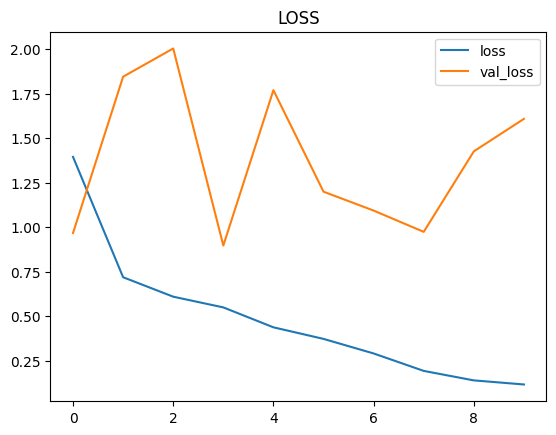

In [47]:
plt.plot(history2.history["loss"], label = "loss")
plt.plot(history2.history["val_loss"], label = "val_loss")
plt.legend()
plt.title("LOSS")
plt.show()

Doing prediction

In [48]:
import cv2

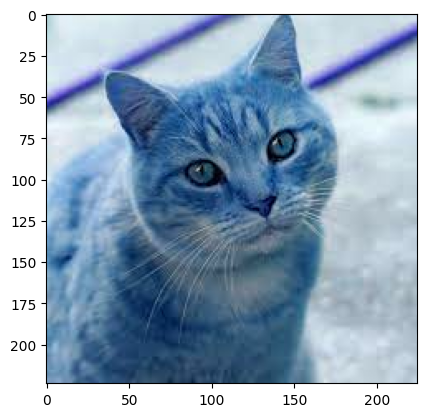

In [49]:
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [50]:
test_img.shape

(224, 225, 3)

In [51]:
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3)) #for testing we provide images in batches. here we only have a one image so we reshape((1,256,256,3) this indicates 1 image with dimension (150,150,3)
model.predict(test_input)

1/1 [==============================] - 0s 243ms/step


array([[1.]], dtype=float32)